**IMPORT CSV**

In [47]:
import geopandas as gpd
import pandas as pd

In [48]:
# importing pandas package
import pandas as pd
 
# making data frame from csv file
df_csv = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/data_bu_azizah/co2_satuan.csv')

**SET THE TIME TO .DATETIME FORMAT**

In [49]:
# overwriting data after changing format
df_csv['time']= pd.to_datetime(df_csv['time'])
 
# info of data
df_csv.info()
 
# display
print(df_csv.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202500 entries, 0 to 202499
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       202500 non-null  datetime64[ns]
 1   latitude   202500 non-null  float64       
 2   longitude  202500 non-null  float64       
 3   co2        202500 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 6.2 MB
        time  latitude   longitude         co2
0 2016-01-01     -8.88  110.910004  610.471237
1 2016-01-01     -8.88  110.960004  610.641677
2 2016-01-01     -8.88  111.010004  610.812117
3 2016-01-01     -8.88  111.060004  610.982557
4 2016-01-01     -8.88  111.110004  611.152997


In [50]:
df_csv['month'] = df_csv['time'].dt.month

In [51]:
df_csv['year'] = df_csv['time'].dt.year

**IMPORT SHP FILE**

In [52]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/roniabuhanif/Downloads/BMKG/data_skripsi/peta_jatim/kabupaten.shp")

**CREATE GEOMETRY FROM SHP AND CSV**

In [53]:
geometry = gpd.points_from_xy(df_csv['longitude'], df_csv['latitude'])
gdf_csv = gpd.GeoDataFrame(df_csv, geometry=geometry, crs='EPSG:4326')

<Axes: >

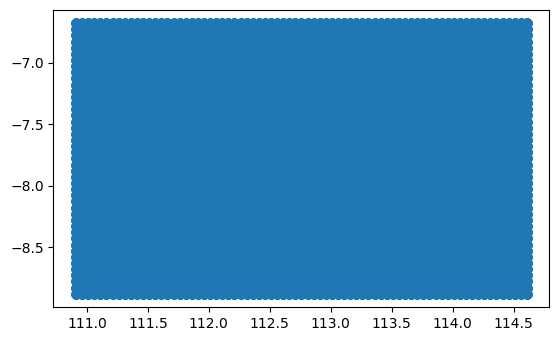

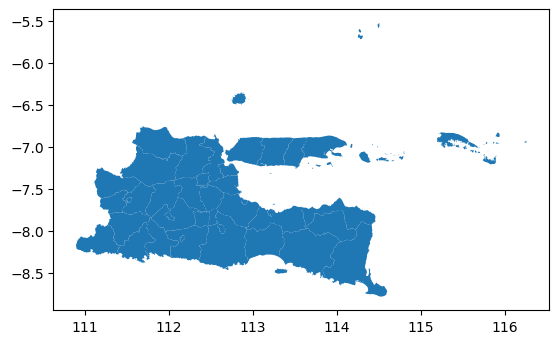

In [54]:
gdf_csv.plot()
gdf_shapefile.plot()

In [55]:
gdf_csv

,time,latitude,longitude,co2,month,year,geometry
0,2016-01-01,-8.88,110.910004,610.471237,1,2016,POINT (110.91000 -8.88000)
1,2016-01-01,-8.88,110.960004,610.641677,1,2016,POINT (110.96000 -8.88000)
2,2016-01-01,-8.88,111.010004,610.812117,1,2016,POINT (111.01000 -8.88000)
3,2016-01-01,-8.88,111.060004,610.982557,1,2016,POINT (111.06000 -8.88000)
4,2016-01-01,-8.88,111.110004,611.152997,1,2016,POINT (111.11000 -8.88000)
...,...,...,...,...,...,...,...
202495,2020-12-01,-6.68,114.410004,629.936617,12,2020,POINT (114.41000 -6.68000)
202496,2020-12-01,-6.68,114.460004,629.887160,12,2020,POINT (114.46000 -6.68000)
202497,2020-12-01,-6.68,114.510004,629.837704,12,2020,POINT (114.51000 -6.68000)
202498,2020-12-01,-6.68,114.560004,629.788248,12,2020,POINT (114.56000 -6.68000)


In [56]:
#join all the variables
result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')

#add the columns
result_pop = result[['longitude', 'latitude', 'month', 'year', 'co2', 'IDKABKOTA', 'geometry', 'time']]

/var/folders/81/vqbnjx_x20zdr2m7bscdvp5r0000gn/T/ipykernel_4017/3093974646.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 91920 entries, 294 to 202296
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   longitude  91920 non-null  float64       
 1   latitude   91920 non-null  float64       
 2   month      91920 non-null  int32         
 3   year       91920 non-null  int32         
 4   co2        91920 non-null  float64       
 5   IDKABKOTA  91920 non-null  object        
 6   geometry   91920 non-null  geometry      
 7   time       91920 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), geometry(1), int32(2), object(1)
memory usage: 5.6+ MB


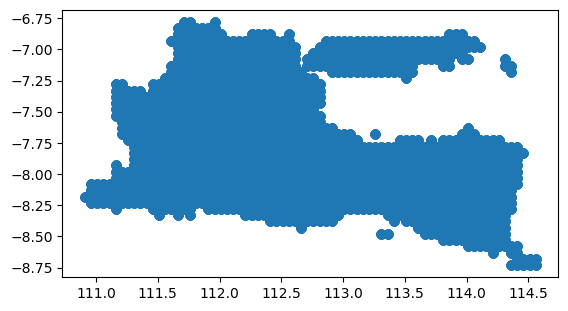

In [57]:
result_pop.plot()
result_pop.info()

**SHOW THE COLUMNS**

In [58]:
#input the columns to get the pm2.5 average/month
dissolved_result = result_pop.dissolve(by=['IDKABKOTA','month'], aggfunc='mean')

dissolved_result.reset_index(inplace=True)
dissolved_result.head()

,IDKABKOTA,month,geometry,longitude,latitude,year,co2,time
0,BANGKALAN,1,"MULTIPOINT ((112.71000 -7.13000), (112.71000 -...",112.924106,-7.049231,2018.0,633.282106,2017-12-31 19:12:00
1,BANGKALAN,2,"MULTIPOINT ((112.71000 -7.13000), (112.71000 -...",112.924106,-7.049231,2018.0,631.685487,2018-01-31 19:12:00
2,BANGKALAN,3,"MULTIPOINT ((112.71000 -7.13000), (112.71000 -...",112.924106,-7.049231,2018.0,629.014732,2018-03-01 04:48:00
3,BANGKALAN,4,"MULTIPOINT ((112.71000 -7.13000), (112.71000 -...",112.924106,-7.049231,2018.0,627.002306,2018-04-01 04:48:00
4,BANGKALAN,5,"MULTIPOINT ((112.71000 -7.13000), (112.71000 -...",112.924106,-7.049231,2018.0,630.801394,2018-05-01 04:48:00


In [59]:
#download data to .csv format
dissolved_result.to_csv('co2_all_month.csv')

**SET FOR MAPPING**

In [60]:
# ubah per month
import pandas as pd

In [61]:
#change into dataframe to drop the 'geometry' columns, etc
dissolved_result_df= pd.DataFrame(dissolved_result)
dissolved_result_df = dissolved_result_df.drop(['geometry'], axis = 1)

In [62]:
dissolved_result_df = dissolved_result_df.sort_values(by=['IDKABKOTA', 'month'])

In [63]:
#download data to .csv format
dissolved_result_df.to_csv('co2_kabkot_month.csv')

In [64]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')
print(polygon_result.columns)

Index(['IDKABKOTA_left', 'COUNT', 'urutan_kab', 'KEPADATAN', 'SEXRATIO', 'TFR',
       'CBR', 'CPR', 'ALH3PLUS', 'UKP', 'NIKAHDINI', 'IMR', 'AHH', 'BUTAHURUF',
       'EKONOMI', 'TPT', 'TPAK', 'PRAKS', 'KS1', 'PRAKS_KS1', 'IPM',
       'JAMBANSEP', 'SAKIT', 'AIRBERSIH', 'LPP', 'ASFR_20_24', 'ASFR',
       'geometry', 'index_right', 'IDKABKOTA_right', 'month', 'longitude',
       'latitude', 'year', 'co2', 'time'],
      dtype='object')


/var/folders/81/vqbnjx_x20zdr2m7bscdvp5r0000gn/T/ipykernel_4017/2287286776.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')


In [65]:
polygon_result

,IDKABKOTA_left,COUNT,urutan_kab,KEPADATAN,SEXRATIO,TFR,CBR,CPR,ALH3PLUS,UKP,...,ASFR,geometry,index_right,IDKABKOTA_right,month,longitude,latitude,year,co2,time
0,BANGKALAN,283,26,696,91.48,1.819,12.42,36.66,35.01,18.64,...,None,"POLYGON ((112.68201 -7.08612, 112.68037 -7.083...",5,BANGKALAN,6,112.924106,-7.049231,2018.0,631.286795,2018-06-01 04:48:00
0,BANGKALAN,283,26,696,91.48,1.819,12.42,36.66,35.01,18.64,...,None,"POLYGON ((112.68201 -7.08612, 112.68037 -7.083...",7,BANGKALAN,8,112.924106,-7.049231,2018.0,628.837755,2018-08-01 04:48:00
0,BANGKALAN,283,26,696,91.48,1.819,12.42,36.66,35.01,18.64,...,None,"POLYGON ((112.68201 -7.08612, 112.68037 -7.083...",8,BANGKALAN,9,112.924106,-7.049231,2018.0,629.484401,2018-09-01 04:48:00
0,BANGKALAN,283,26,696,91.48,1.819,12.42,36.66,35.01,18.64,...,None,"POLYGON ((112.68201 -7.08612, 112.68037 -7.083...",9,BANGKALAN,10,112.924106,-7.049231,2018.0,630.993245,2018-10-01 04:48:00
0,BANGKALAN,283,26,696,91.48,1.819,12.42,36.66,35.01,18.64,...,None,"POLYGON ((112.68201 -7.08612, 112.68037 -7.083...",10,BANGKALAN,11,112.924106,-7.049231,2018.0,633.221647,2018-11-01 04:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,TULUNGAGUNG,280,4,860,95.16,2.097,14.43,54.01,25.01,20.62,...,None,"POLYGON ((112.11581 -8.14095, 112.11569 -8.142...",446,TULUNGAGUNG,3,111.891254,-8.115000,2018.0,629.845815,2018-03-01 04:48:00
37,TULUNGAGUNG,280,4,860,95.16,2.097,14.43,54.01,25.01,20.62,...,None,"POLYGON ((112.11581 -8.14095, 112.11569 -8.142...",445,TULUNGAGUNG,2,111.891254,-8.115000,2018.0,632.809688,2018-01-31 19:12:00
37,TULUNGAGUNG,280,4,860,95.16,2.097,14.43,54.01,25.01,20.62,...,None,"POLYGON ((112.11581 -8.14095, 112.11569 -8.142...",444,TULUNGAGUNG,1,111.891254,-8.115000,2018.0,635.108337,2017-12-31 19:12:00
37,TULUNGAGUNG,280,4,860,95.16,2.097,14.43,54.01,25.01,20.62,...,None,"POLYGON ((112.11581 -8.14095, 112.11569 -8.142...",454,TULUNGAGUNG,11,111.891254,-8.115000,2018.0,628.324915,2018-11-01 04:48:00


**MAPPING**

In [66]:
import calendar
import matplotlib.pyplot as plt

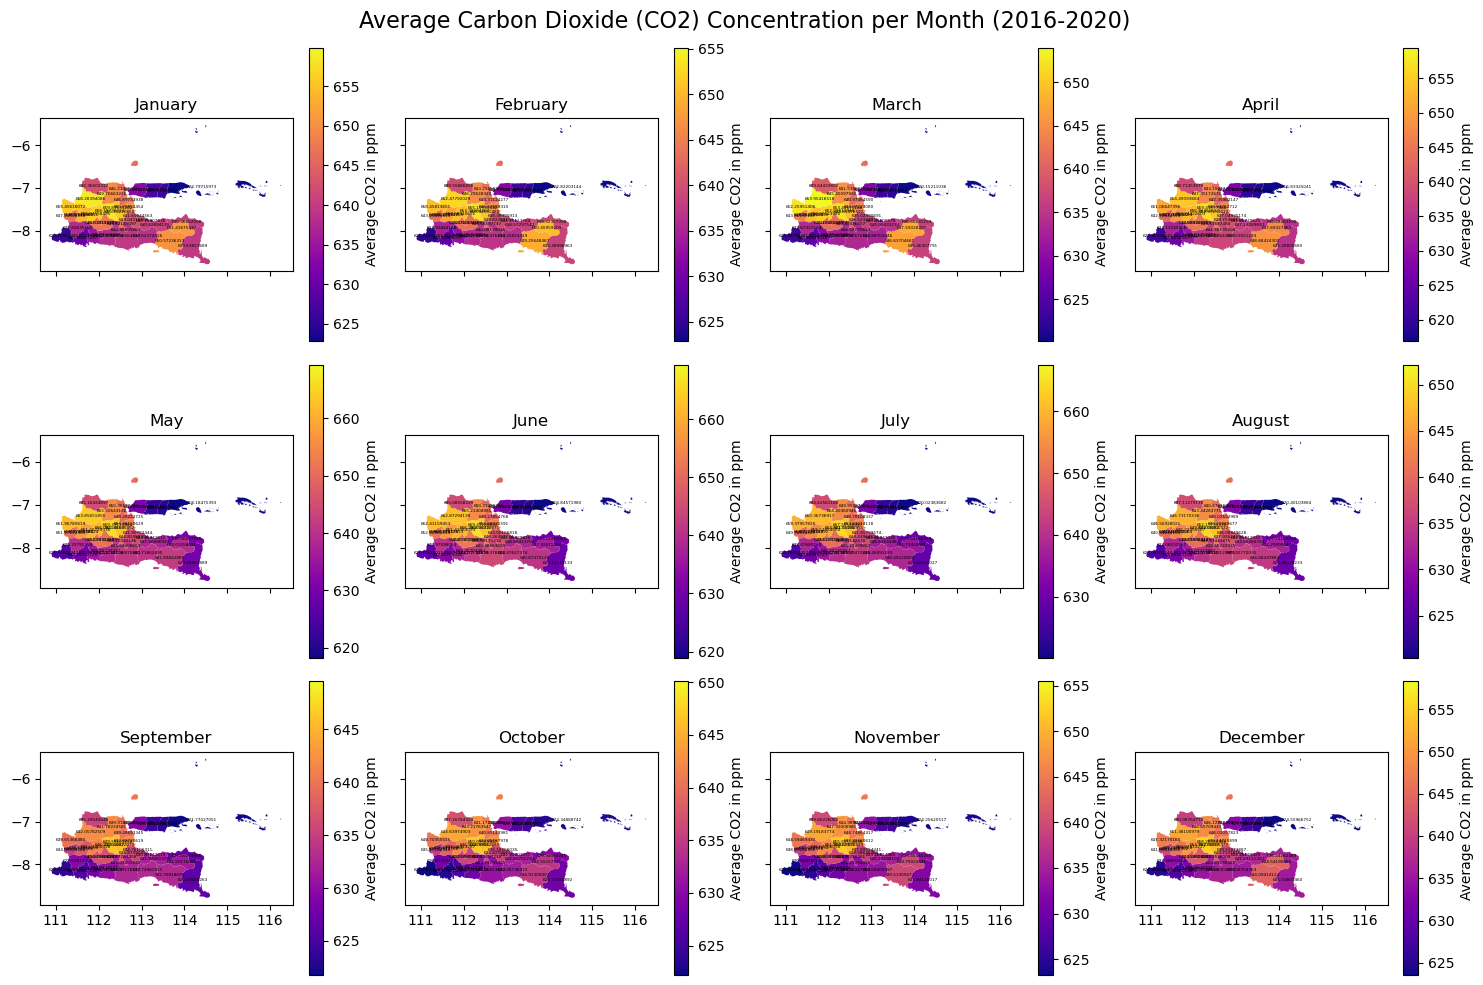

In [67]:
# Create a figure with subplots for each month
fig, axs = plt.subplots(3, 4, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Average Carbon Dioxide (CO2) Concentration per Month (2016-2020)', fontsize=16)

# Iterate through each month and plot the data
for month, ax in zip(range(1, 13), axs.flatten()):
    # Filter data for the current month
    data_monthly = polygon_result[polygon_result['month'] == month]

    # Plot the map for the current month
    data_monthly.plot(ax=ax, column="co2", legend=True, legend_kwds={"label": "Average CO2 in ppm"})

    # Annotate each polygon with average PM2.5 value
    for idx, row in data_monthly.iterrows():
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['co2']:.8f}", fontsize=3, ha='center', va='center')

    ax.set_title(calendar.month_name[month])  # Menggunakan modul calendar untuk mendapatkan nama bulan

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])


# If u want to change the color, use this script
# The colors are limited based on cmap
# Put these script before plt.show()
cmap = plt.get_cmap('plasma')
plt.set_cmap(cmap)
plt.show()

**GRAPHS**

In [68]:
import calendar

# Format for monthly graph
dissolved_result_df['month_name'] = pd.to_datetime(dissolved_result_df['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
dissolved_result_df= dissolved_result_df.set_index('month_name')

BANGKALAN
            IDKABKOTA  month   longitude  latitude    year         co2  \
month_name                                                               
January     BANGKALAN      1  112.924106 -7.049231  2018.0  633.282106   
February    BANGKALAN      2  112.924106 -7.049231  2018.0  631.685487   
March       BANGKALAN      3  112.924106 -7.049231  2018.0  629.014732   
April       BANGKALAN      4  112.924106 -7.049231  2018.0  627.002306   
May         BANGKALAN      5  112.924106 -7.049231  2018.0  630.801394   
June        BANGKALAN      6  112.924106 -7.049231  2018.0  631.286795   
July        BANGKALAN      7  112.924106 -7.049231  2018.0  631.870338   
August      BANGKALAN      8  112.924106 -7.049231  2018.0  628.837755   
September   BANGKALAN      9  112.924106 -7.049231  2018.0  629.484401   
October     BANGKALAN     10  112.924106 -7.049231  2018.0  630.993245   
November    BANGKALAN     11  112.924106 -7.049231  2018.0  633.221647   
December    BANGKALAN     12

BOJONEGORO
             IDKABKOTA  month   longitude  latitude    year         co2  \
month_name                                                                
January     BOJONEGORO      1  111.811355 -7.261757  2018.0  658.283941   
February    BOJONEGORO      2  111.811355 -7.261757  2018.0  652.477920   
March       BOJONEGORO      3  111.811355 -7.261757  2018.0  653.954165   
April       BOJONEGORO      4  111.811355 -7.261757  2018.0  654.490937   
May         BOJONEGORO      5  111.811355 -7.261757  2018.0  663.856519   
June        BOJONEGORO      6  111.811355 -7.261757  2018.0  662.872941   
July        BOJONEGORO      7  111.811355 -7.261757  2018.0  660.367369   
August      BOJONEGORO      8  111.811355 -7.261757  2018.0  646.731705   
September   BOJONEGORO      9  111.811355 -7.261757  2018.0  642.057825   
October     BOJONEGORO     10  111.811355 -7.261757  2018.0  644.639749   
November    BOJONEGORO     11  111.811355 -7.261757  2018.0  649.191838   
December    BO

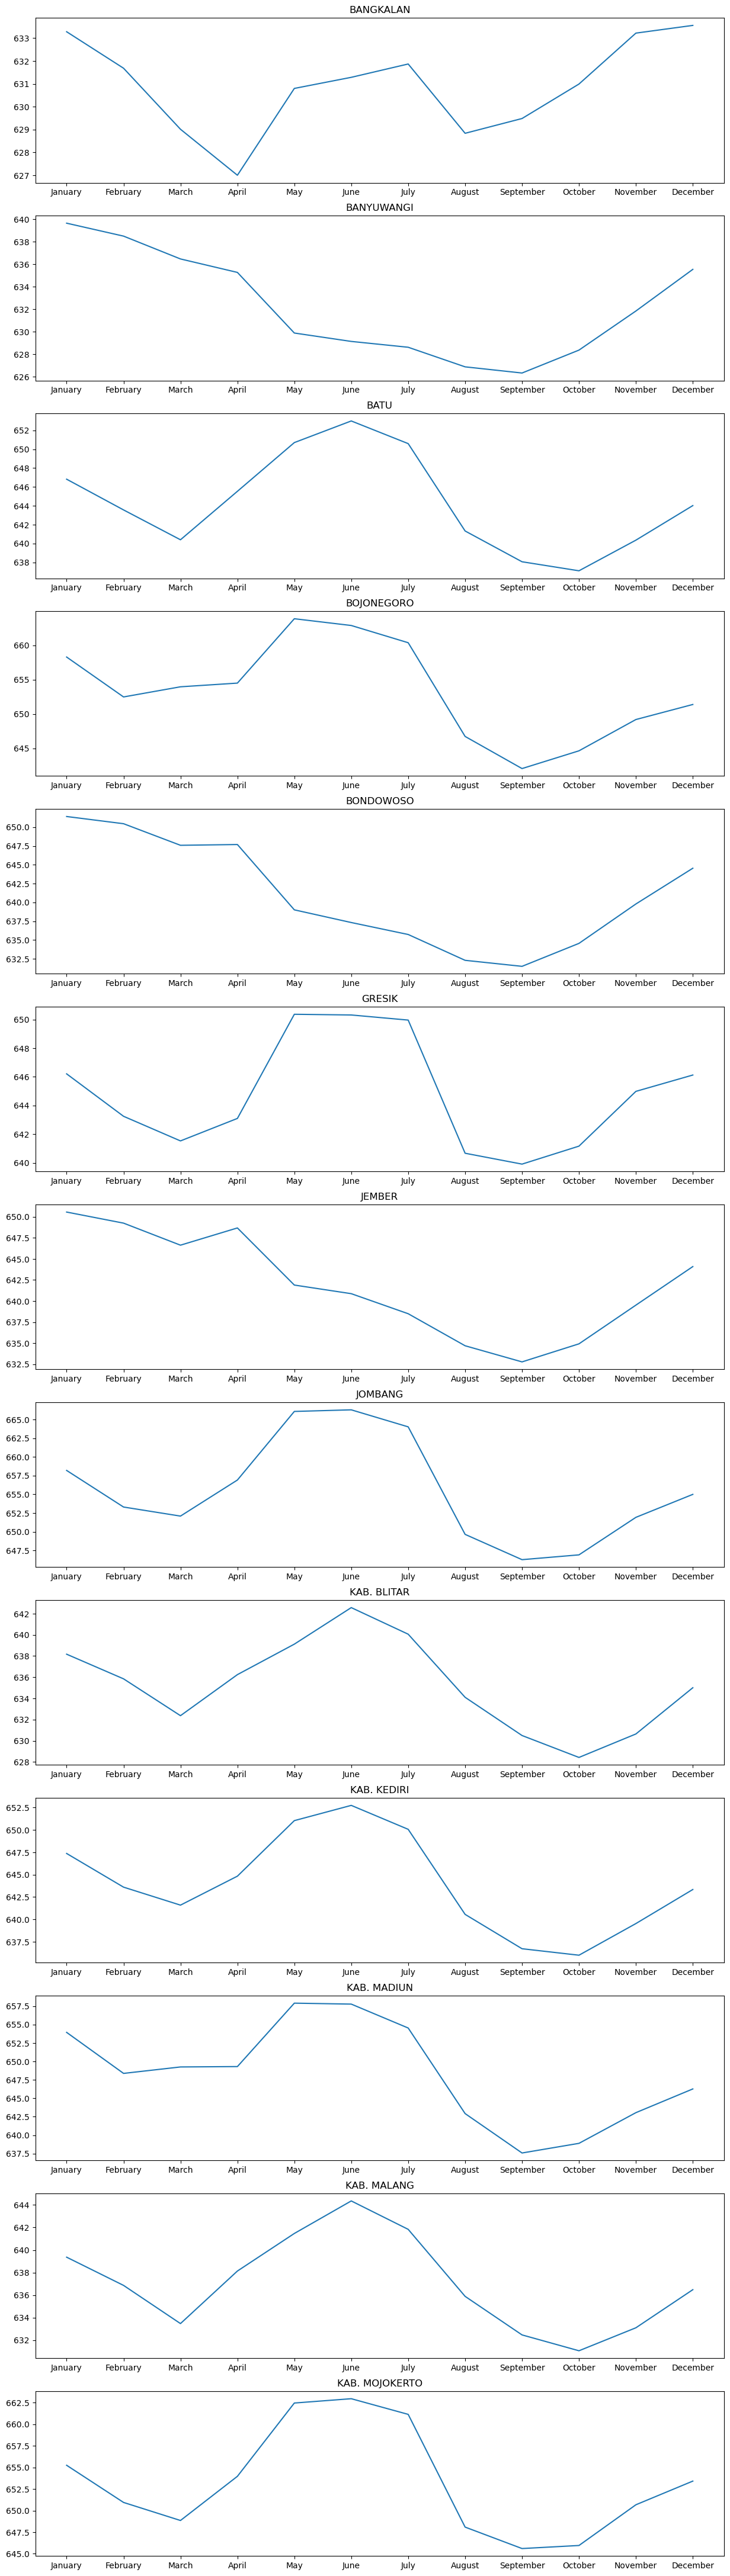

In [69]:
fig  = plt.figure(figsize=(15,60))
cities = list(dissolved_result_df['IDKABKOTA'].unique())
# Iterate through each month and plot the data
for city, ax in zip(cities, range(1,14)):
    # Filter data for the current wilayah admin
    data_city = dissolved_result_df[dissolved_result_df['IDKABKOTA'] == city]
    print(city)
    print(data_city)
    # Plot the map for the current kabkot
    fig.add_subplot(14, 1, ax)
    plt.plot(data_city['co2'])
    plt.title(city)
    #ax.set_title(f'{city}')
